In [2]:
#Ici , on va applquer les algorithmes de classification de machines learning pour déter²miner si un film est un succès commercial ou non
#On va d'abord transformé le dataset pour un apprentissage supervisé pour appliquer les algorithmes de regression
#Un film a succès commercial est un film qui a rapporté plus de la moyenne du revenu mois les budgets de production
import pandas as pd

df=pd.read_csv('movie_dataset_cleaned_final.csv')

#Afficher la moyenne du budget
print("Moyenne du budget:", df['budget'].mean())
#Moyenne des revenus
print("Moyenne des revenus:", df['revenue'].mean())
#Moyenne des revenues moins le budget 
print("Moyenne des revenus moins le budget:", (df['revenue'] - df['budget']).mean())
print("Revenues pour etre un film à succès commercial:", df['revenue'].mean() - df['budget'].mean())



Moyenne du budget: 29045039.87528628
Moyenne des revenus: 82260638.65167603
Moyenne des revenus moins le budget: 53215598.776389755
Revenues pour etre un film à succès commercial: 53215598.77638975


In [3]:
#Maintenant on transforme le dataset pour un apprentissage supervisé
#On ajoute une colonne "success" qui vaut 1 si le film est un succès commercial
df['success'] = ((df['revenue'] - df['budget']) > (df['revenue'].mean() - df['budget'].mean())).astype(int)
print(df[['budget', 'revenue', 'success']].head())

#On sauvegarde le nouveau dataset 
df.to_csv('movie_dataset_supervised.csv', index=False)




      budget     revenue  success
0  237000000  2787965087        1
1  300000000   961000000        1
2  245000000   880674609        1
3  250000000  1084939099        1
4  260000000   284139100        0


In [4]:
#Maintennant on va supprimer les colonnes inutiles pour l'apprentissage supervisé
columns_to_drop = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'cast','revenue']
df_supervised = df.drop(columns=columns_to_drop)
df_supervised.to_csv('movie_dataset_supervised_cleaned.csv', index=False)
#On sauvegarde le nouveau dataset nettoyé 

print("Nouveau dataset pour apprentissage supervisé sauvegardé sous 'movie_dataset_supervised_cleaned.csv'")

Nouveau dataset pour apprentissage supervisé sauvegardé sous 'movie_dataset_supervised_cleaned.csv'


In [5]:
#Affichage
import pandas
df1= pandas.read_csv('movie_dataset_supervised_cleaned.csv')

print(df1.head())

      budget original_language  popularity  runtime  vote_average  vote_count  \
0  237000000                en  150.437577    162.0           7.2       11800   
1  300000000                en  139.082615    169.0           6.9        4500   
2  245000000                en  107.376788    148.0           6.3        4466   
3  250000000                en  112.312950    165.0           7.6        9106   
4  260000000                en   43.926995    132.0           6.1        2124   

            director  success  
0      James Cameron        1  
1     Gore Verbinski        1  
2         Sam Mendes        1  
3  Christopher Nolan        1  
4     Andrew Stanton        0  


In [29]:
# -----------------------------
# Classification : Arbre de Décision
# -----------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Encodage des variables catégorielles ---
# Conversion des colonnes texte en variables numériques
df_supervised_encoded = pd.get_dummies(df_supervised, drop_first=True)

# --- 2. Séparation variables explicatives / variable cible ---
X = df_supervised_encoded.drop('success', axis=1)
y = df_supervised_encoded['success']

# --- 3. Split des données ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 4. Création du modèle ---
model = DecisionTreeClassifier()

# --- 5. Entraînement ---
model.fit(X_train, y_train)

# --- 6. Prédiction ---
y_pred = model.predict(X_test)

# --- 7. Évaluation du modèle ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Nombre de correctements classifiés
correct_predictions = (y_test == y_pred).sum()
total_predictions = y_test.shape[0]
print(f"Nombre de prédictions correctes: {correct_predictions} sur {total_predictions}")

#Score de précision
accuracy = correct_predictions / total_predictions
print(f"Précision du modèle: {accuracy:.2f}")



Confusion Matrix:
[[632  74]
 [ 97 158]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88       706
         1.0       0.68      0.62      0.65       255

    accuracy                           0.82       961
   macro avg       0.77      0.76      0.76       961
weighted avg       0.82      0.82      0.82       961

Nombre de prédictions correctes: 790 sur 961
Précision du modèle: 0.82


In [30]:
#Maintenant on va appliquer random forest pour la classification
from sklearn.ensemble import RandomForestClassifier
# --- 4. Création du modèle ---
model = RandomForestClassifier(n_estimators=200, random_state=42)
# --- 5. Entraînement ---
model.fit(X_train, y_train)
# --- 6. Prédiction ---
y_pred = model.predict(X_test)
# --- 7. Évaluation du modèle ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Nombre de correctements classifiés
correct_predictions = (y_test == y_pred).sum()
total_predictions = y_test.shape[0]
print(f"Nombre de prédictions correctes: {correct_predictions} sur {total_predictions}")

#Score de précision
accuracy = correct_predictions / total_predictions
print(f"Précision du modèle: {accuracy:.2f}")

Confusion Matrix:
[[663  43]
 [ 84 171]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       706
         1.0       0.80      0.67      0.73       255

    accuracy                           0.87       961
   macro avg       0.84      0.80      0.82       961
weighted avg       0.86      0.87      0.86       961

Nombre de prédictions correctes: 834 sur 961
Précision du modèle: 0.87


In [31]:
# Maintenant on va appliquer le classifieur bayésien (Naive Bayes)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# --- 1. Charger le dataset supervisé ---
df_supervised = pd.read_csv('movie_dataset_supervised_cleaned.csv')

# --- 2. Imputer les valeurs manquantes ---
imputer = SimpleImputer(strategy='mean')
for col in df_supervised.select_dtypes(include=['float64', 'int64']).columns:
    df_supervised[col] = imputer.fit_transform(df_supervised[[col]])

# --- 3. Encodage des variables catégorielles ---
df_supervised_encoded = pd.get_dummies(df_supervised, drop_first=True)

# --- 4. Séparation variables explicatives / variable cible ---
X = df_supervised_encoded.drop('success', axis=1)
y = df_supervised_encoded['success']

# --- 5. Split des données ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# --- 6. Création du modèle ---
model = GaussianNB()

# --- 7. Entraînement ---
model.fit(X_train, y_train)

# --- 8. Prédiction ---
y_pred = model.predict(X_test)

# --- 9. Évaluation du modèle ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Nombre de correctements classifiés
correct_predictions = (y_test == y_pred).sum()
total_predictions = y_test.shape[0]
print(f"Nombre de prédictions correctes: {correct_predictions} sur {total_predictions}")

# Score de précision
accuracy = correct_predictions / total_predictions
print(f"Précision du modèle: {accuracy:.2f}")

Confusion Matrix:
[[1687   77]
 [ 381  257]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      1764
         1.0       0.77      0.40      0.53       638

    accuracy                           0.81      2402
   macro avg       0.79      0.68      0.70      2402
weighted avg       0.80      0.81      0.79      2402

Nombre de prédictions correctes: 1944 sur 2402
Précision du modèle: 0.81


In [33]:
# Maintenant on va appliquer K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# --- 1. Charger le dataset supervisé ---
df_supervised = pd.read_csv('movie_dataset_supervised_cleaned.csv')

# --- 2. Imputer les valeurs manquantes ---
imputer = SimpleImputer(strategy='mean')
for col in df_supervised.select_dtypes(include=['float64', 'int64']).columns:
    df_supervised[col] = imputer.fit_transform(df_supervised[[col]])

# --- 3. Encodage des variables catégorielles ---
df_supervised_encoded = pd.get_dummies(df_supervised, drop_first=True)

# --- 4. Séparation variables explicatives / variable cible ---
X = df_supervised_encoded.drop('success', axis=1)
y = df_supervised_encoded['success']

# --- 5. Split des données ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 6. Création du modèle ---
model = KNeighborsClassifier(n_neighbors=5)

# --- 7. Entraînement ---
model.fit(X_train, y_train)

# --- 8. Prédiction ---
y_pred = model.predict(X_test)

# --- 9. Évaluation du modèle ---
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Nombre de correctements classifiés
correct_predictions = (y_test == y_pred).sum()
total_predictions = y_test.shape[0]
print(f"Nombre de prédictions correctes: {correct_predictions} sur {total_predictions}")

# Score de précision
accuracy = correct_predictions / total_predictions
print(f"Précision du modèle: {accuracy:.2f}")

Confusion Matrix:
[[635  71]
 [ 92 163]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       706
         1.0       0.70      0.64      0.67       255

    accuracy                           0.83       961
   macro avg       0.79      0.77      0.78       961
weighted avg       0.83      0.83      0.83       961

Nombre de prédictions correctes: 798 sur 961
Précision du modèle: 0.83


Cross-validation avec Random Forest (200 arbres) :
K=2 -> Accuracy moyenne = 0.8615, Std = 0.0026
K=3 -> Accuracy moyenne = 0.8652, Std = 0.0083
K=4 -> Accuracy moyenne = 0.8623, Std = 0.0068
K=5 -> Accuracy moyenne = 0.8670, Std = 0.0067
K=6 -> Accuracy moyenne = 0.8647, Std = 0.0060
K=7 -> Accuracy moyenne = 0.8665, Std = 0.0041
K=8 -> Accuracy moyenne = 0.8670, Std = 0.0073
K=9 -> Accuracy moyenne = 0.8673, Std = 0.0086
K=10 -> Accuracy moyenne = 0.8667, Std = 0.0079
K=11 -> Accuracy moyenne = 0.8691, Std = 0.0159
K=12 -> Accuracy moyenne = 0.8699, Std = 0.0125
K=13 -> Accuracy moyenne = 0.8673, Std = 0.0162
K=14 -> Accuracy moyenne = 0.8670, Std = 0.0149
K=15 -> Accuracy moyenne = 0.8662, Std = 0.0132
K=16 -> Accuracy moyenne = 0.8670, Std = 0.0157
K=17 -> Accuracy moyenne = 0.8678, Std = 0.0178
K=18 -> Accuracy moyenne = 0.8657, Std = 0.0173
K=19 -> Accuracy moyenne = 0.8675, Std = 0.0149
K=20 -> Accuracy moyenne = 0.8660, Std = 0.0151
K=21 -> Accuracy moyenne = 0.8662, Std = 0.01

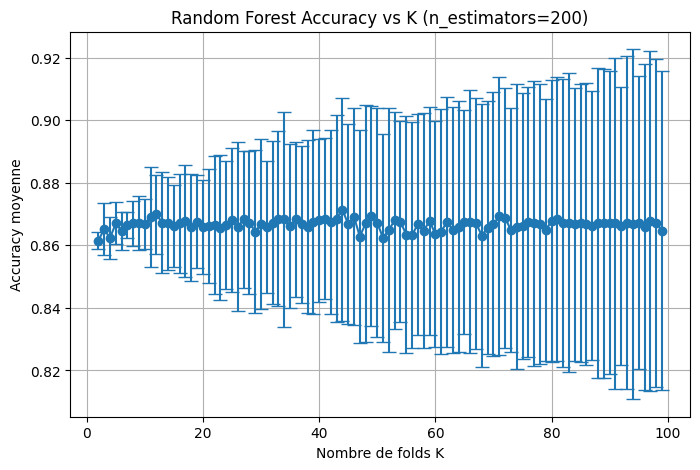


Meilleur K pour la CV = 44 avec Accuracy moyenne = 0.8714


In [37]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# --- 1. Charger dataset ---
df = pd.read_csv("movie_dataset_supervised_cleaned.csv")

# --- 2. Séparer variables explicatives / variable cible ---
X = df.drop("success", axis=1)
y = df["success"]

# --- 3. Colonnes numériques / catégorielles ---
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# --- 4. Préprocessing ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# --- 5. Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 6. Pipeline Random Forest ---
n_estimators_value = 200  # Fixé à 200 arbres
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=n_estimators_value, random_state=42, n_jobs=-1))
])

# --- 7. Tester différentes valeurs de K pour la cross-validation ---
k_values = [i for i in range(2, 100)]  # valeurs de K pour la CV
mean_scores = []
std_scores = []

print(f"Cross-validation avec Random Forest ({n_estimators_value} arbres) :")
for k in k_values:
    scores = cross_val_score(clf, X_train, y_train, cv=k, scoring='accuracy')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())
    print(f"K={k} -> Accuracy moyenne = {scores.mean():.4f}, Std = {scores.std():.4f}")

# --- 8. Graphique Accuracy vs K ---
plt.figure(figsize=(8,5))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='-o', capsize=5)
plt.title(f"Random Forest Accuracy vs K (n_estimators={n_estimators_value})")
plt.xlabel("Nombre de folds K")
plt.ylabel("Accuracy moyenne")
plt.grid(True)
plt.show()

# --- 9. Meilleur K selon CV ---
best_k = k_values[mean_scores.index(max(mean_scores))]
best_score = max(mean_scores)
print(f"\nMeilleur K pour la CV = {best_k} avec Accuracy moyenne = {best_score:.4f}")
